In [10]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [12]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
data = pd.read_csv(base_path + "/#02_HR_Data_15000_도시별_직무별 특징분류.csv")
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [13]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [14]:
# 결측치가 있어, 결측치를 제거해줍니다.
data.dropna(inplace=True)

In [15]:
# 데이터의 통계량을 확인합니다.
data.describe()

,enrollee_id,city_development_index,training_hours
count,7440.000000,7440.000000,7440.000000
mean,16715.588306,0.859763,65.011156
std,9911.275697,0.101343,59.694545
min,6.000000,0.493000,1.000000
25%,7873.500000,0.836000,23.000000
50%,16864.500000,0.910000,47.000000
75%,25767.250000,0.920000,88.000000
max,33378.000000,0.949000,336.000000


In [16]:
# plotting을 위해 사용하는 parameter들을 사용자로부터 입력받습니다.

# x는 lineplot의 x축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 x축에 표시하고 싶은 column의 이름을 입력하세요.
# x축 정보는 lineplot이 나뉘는 기준입니다.
x = input("lineplot의 x축이 되는 column을 입력하세요 : ")
# y는 lineplot의 y축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 y축에 표시하고 싶은 column의 이름을 입력하세요.
# y축 정보는 lineplot에 들어가는 실제값입니다.
y = input("lineplot의 y축이 되는 column을 입력하세요 : ")
# hue는 lineplot에서 각 plot마다 색을 다르게 주는 기준이 되는 feature를 의미합니다. data에 존재하는 column중에 hue에 표시하고 싶은 column의 이름을 입력하세요.
# hue는 plot에서 색 정보를 통해서 구분되어 표현되는 column을 의미합니다.
hue = input("lineplot의 색상 구분의 기준이 되는 column을 입력하세요 : ")

lineplot의 x축이 되는 column을 입력하세요 : education_level
lineplot의 y축이 되는 column을 입력하세요 : training_hours
lineplot의 색상 구분의 기준이 되는 column을 입력하세요 : gender


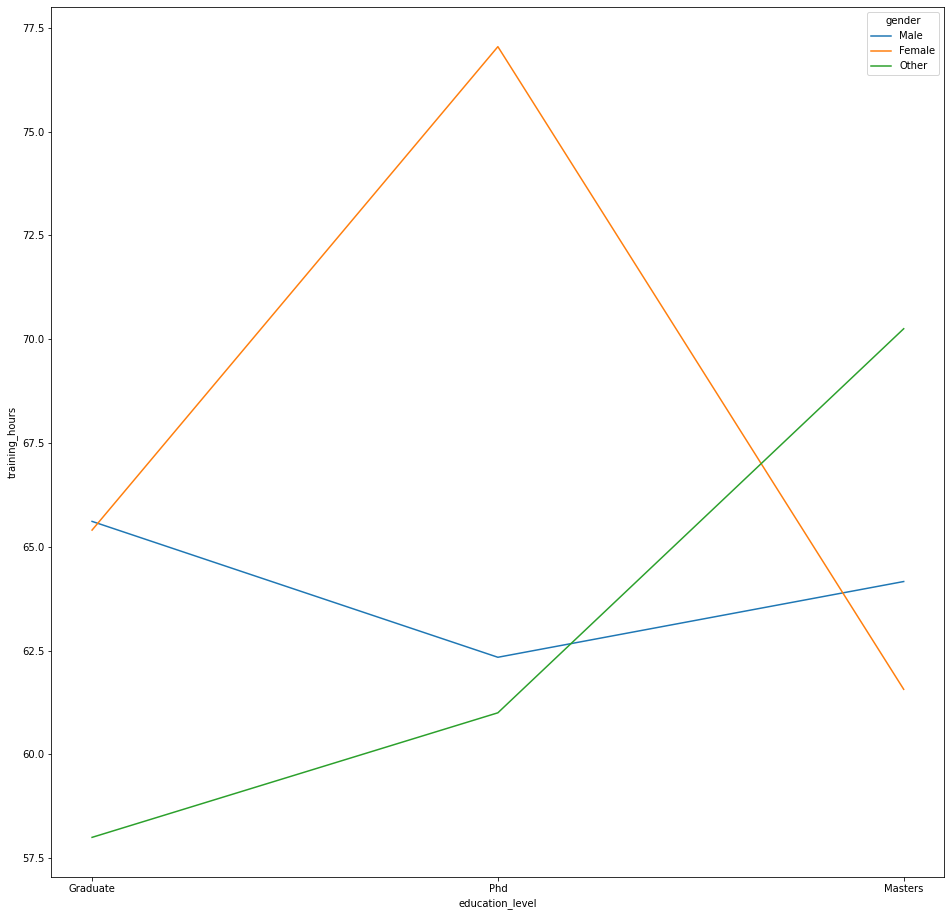

In [18]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# lineplot을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 입력받은 x, y, hue를 기준으로 lineplot을 그립니다.
sns.lineplot(data=data, x=x, y=y, hue=hue, ci=None)
# plot을 출력합니다.
plt.show()